In [7]:
library('igraph')
library('Matrix')
library('pracma')
library('R.utils')

### Part 2: Google+ network


#### Q18

In [21]:
files.names <- dir(path=".", pattern="*.circles", include.dirs=TRUE, recursive=TRUE);

count = 0

for(i in 1:length(files.names)){

    if(countLines(files.names[i])>2) {
        print(files.names[i]);
        count = count + 1
    }
}

print(count)

[1] "gplus/100535338638690515335.circles"
[1] "gplus/100962871525684315897.circles"
[1] "gplus/101130571432010257170.circles"
[1] "gplus/101185748996927059931.circles"
[1] "gplus/101263615503715477581.circles"
[1] "gplus/101373961279443806744.circles"
[1] "gplus/101541879642294398860.circles"
[1] "gplus/101626577406833098387.circles"
[1] "gplus/102170431816592344972.circles"
[1] "gplus/102615863344410467759.circles"
[1] "gplus/102778563580121606331.circles"
[1] "gplus/103236949470535942612.circles"
[1] "gplus/103892332449873403244.circles"
[1] "gplus/104105354262797387583.circles"
[1] "gplus/104607825525972194062.circles"
[1] "gplus/104672614700283598130.circles"
[1] "gplus/104987932455782713675.circles"
[1] "gplus/106186407539128840569.circles"
[1] "gplus/106228758905254036967.circles"
[1] "gplus/106382433884876652170.circles"
[1] "gplus/106837574755355833243.circles"
[1] "gplus/107040353898400532534.circles"
[1] "gplus/107203023379915799071.circles"
[1] "gplus/107223200089245371832.c

#### Q19

In [21]:
# 109327480479767108490
# 115625564993990145546
# 101373961279443806744

d1 <- read.table("gplus/109327480479767108490.edges", colClasses="character")
g1 <- graph_from_data_frame(d1, directed=TRUE)
d2 <- read.table("gplus/115625564993990145546.edges", colClasses="character")
g2 <- graph_from_data_frame(d2, directed=TRUE)
d3 <- read.table("gplus/101373961279443806744.edges", colClasses="character")
g3 <- graph_from_data_frame(d3, directed=TRUE)

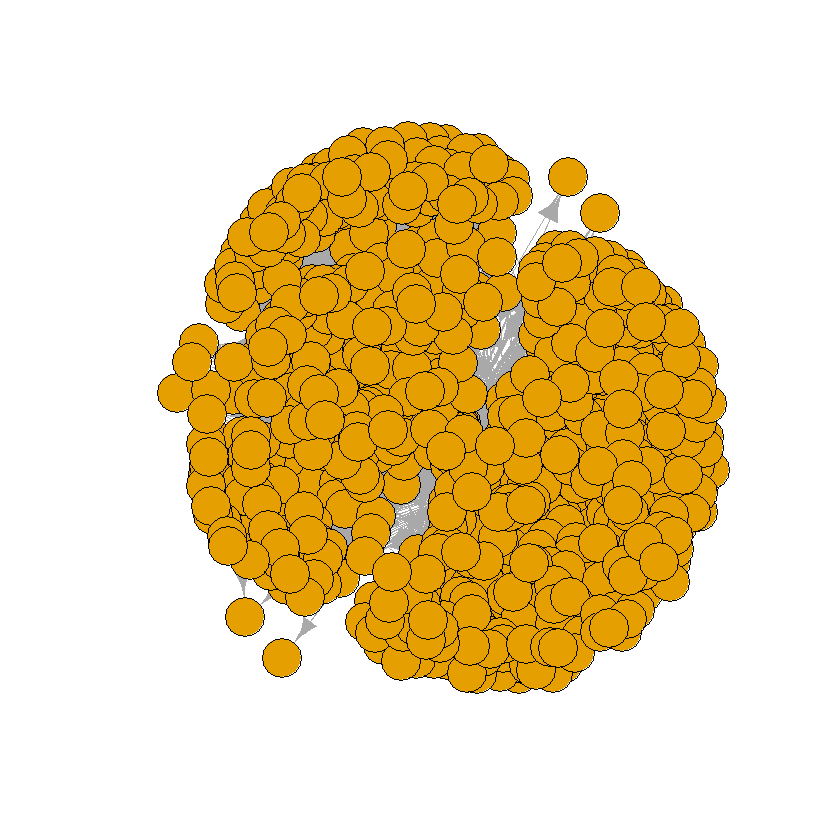

In [9]:
plot(g1,vertex.label=NA)

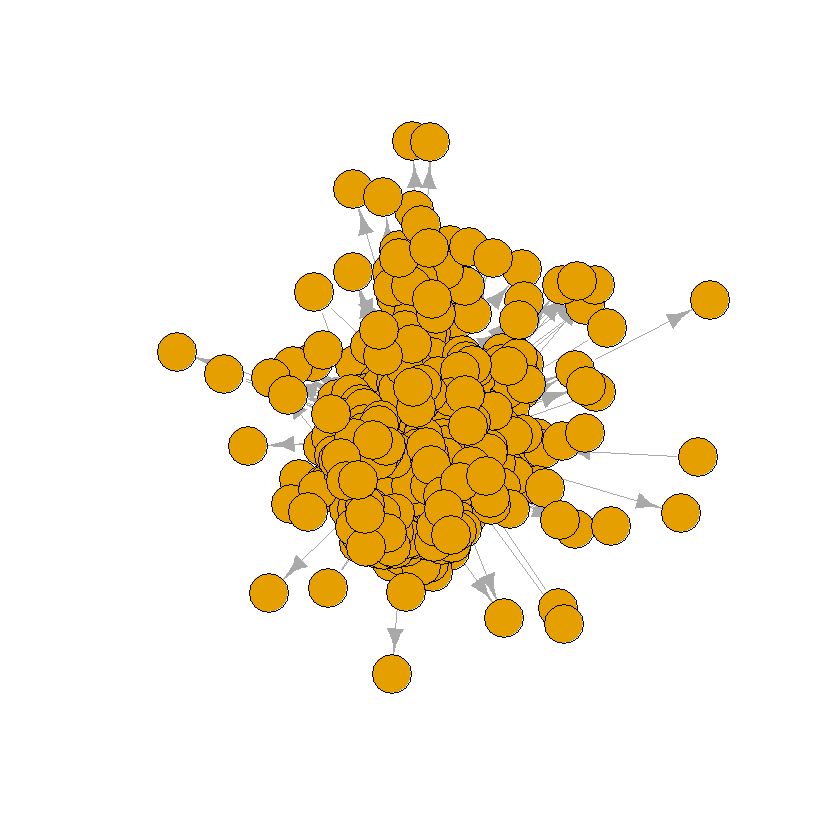

In [10]:
plot(g2,vertex.label=NA)

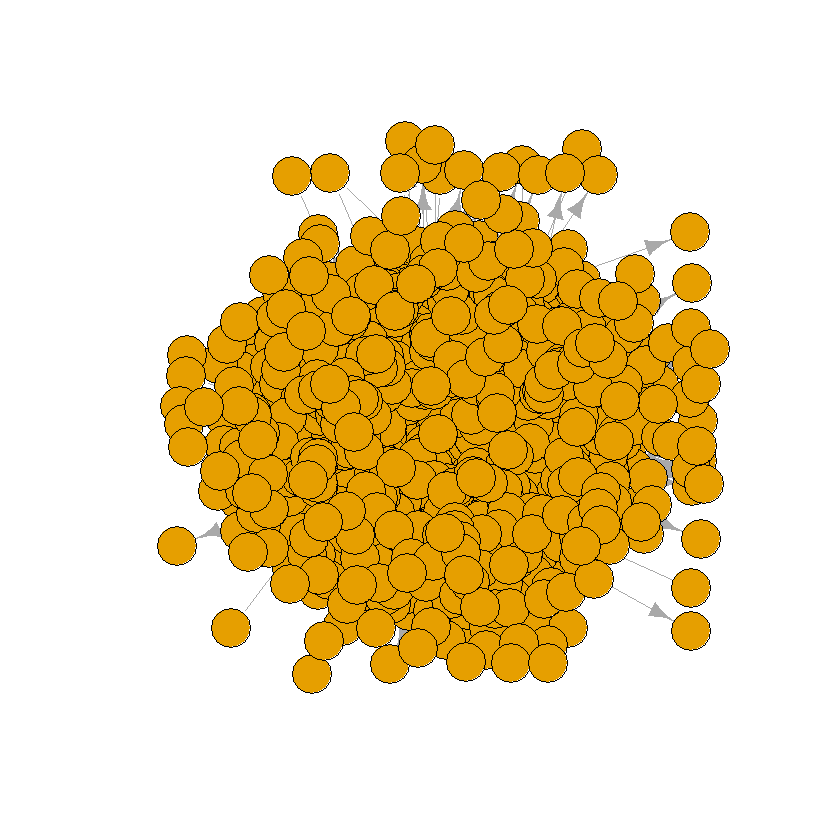

In [11]:
plot(g3,vertex.label=NA)

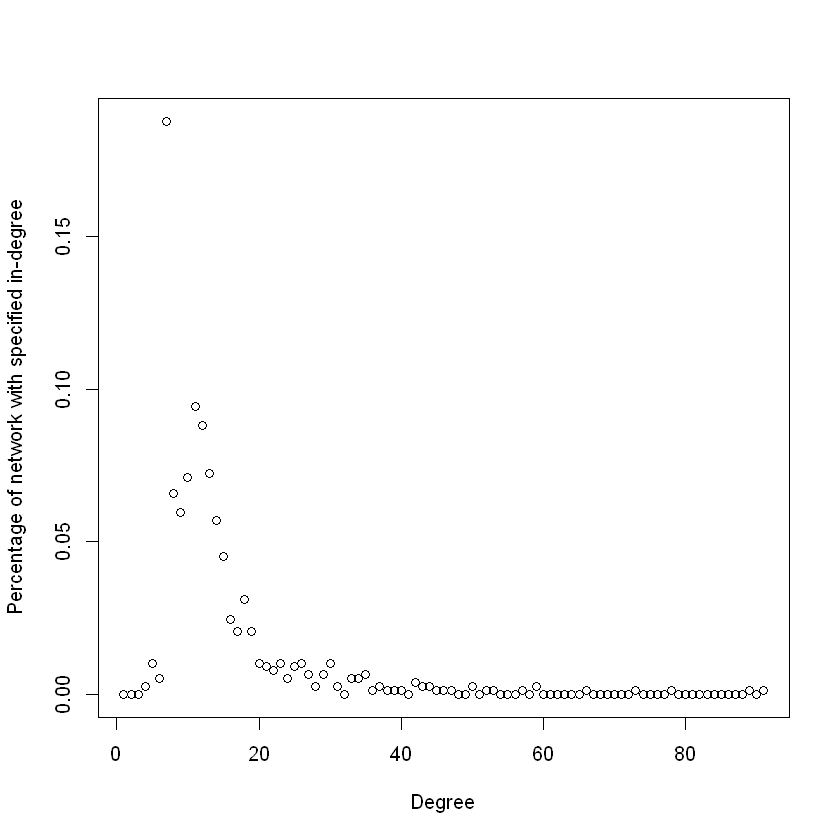

In [44]:
dist = degree_distribution(g1, mode = "in")
plot(dist, xlab="Degree", ylab="Percentage of network with specified in-degree")

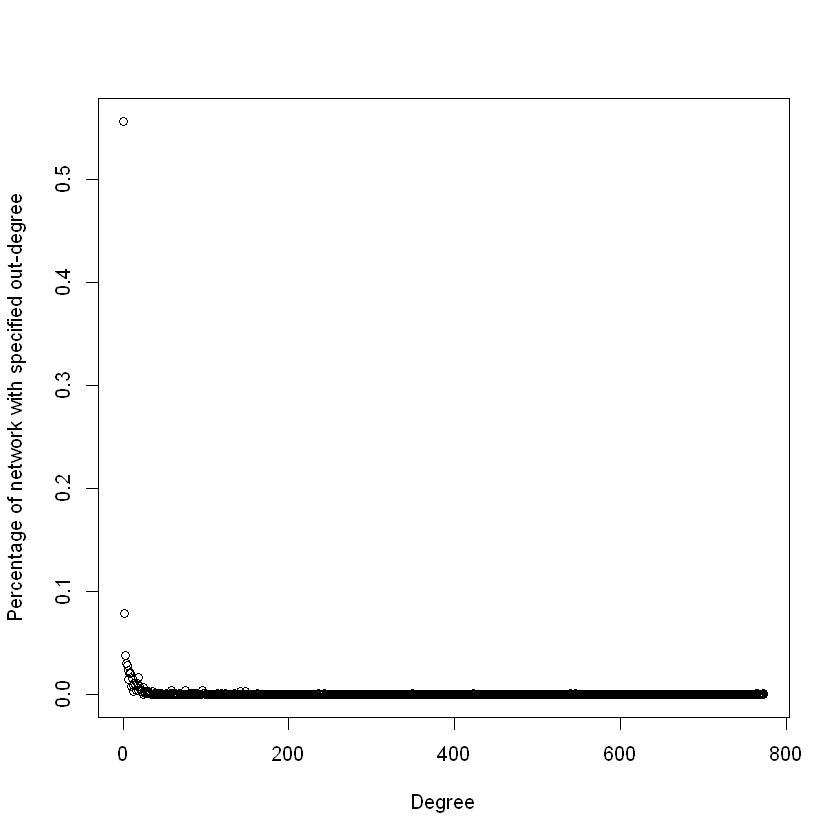

In [45]:
dist = degree_distribution(g1, mode = "out")
plot(dist, xlab="Degree", ylab="Percentage of network with specified out-degree")

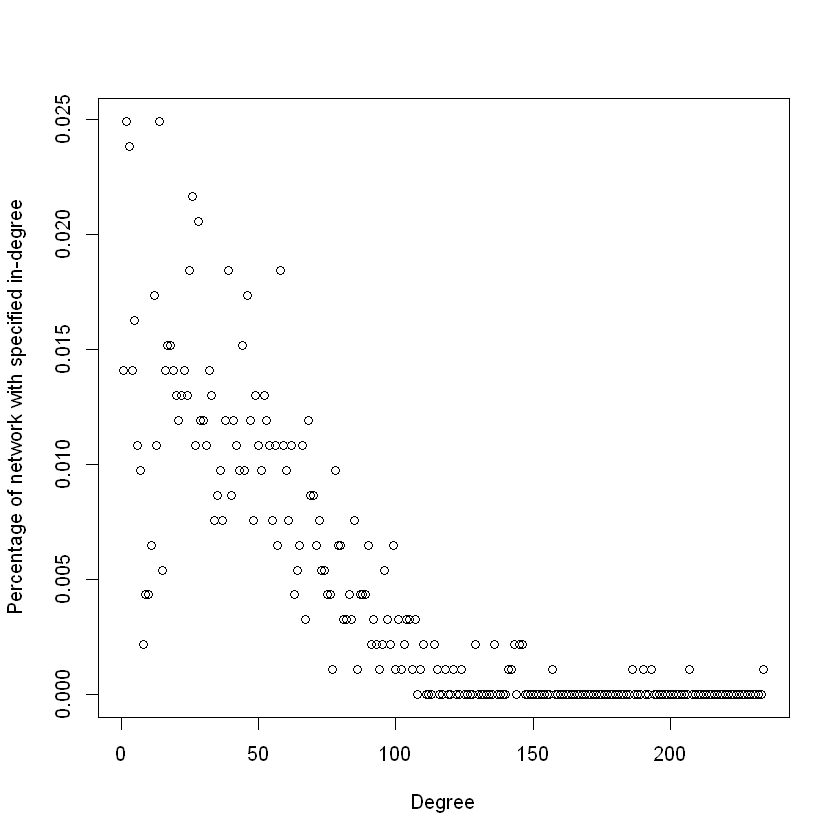

In [46]:
dist = degree_distribution(g2, mode = "in")
plot(dist, xlab="Degree", ylab="Percentage of network with specified in-degree")

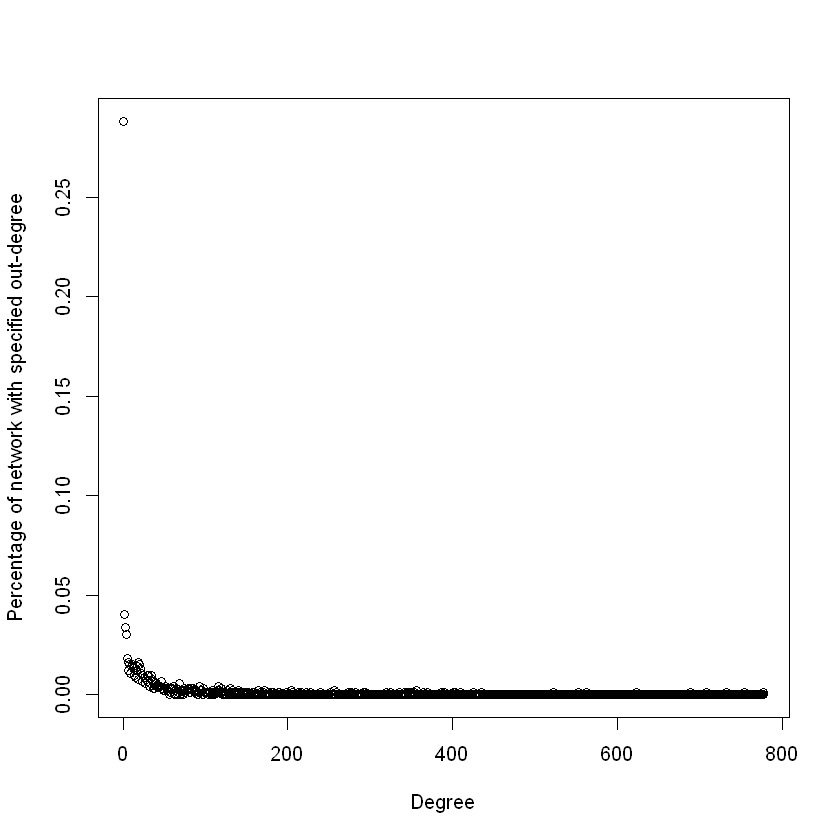

In [47]:
dist = degree_distribution(g2, mode = "out")
plot(dist, xlab="Degree", ylab="Percentage of network with specified out-degree")

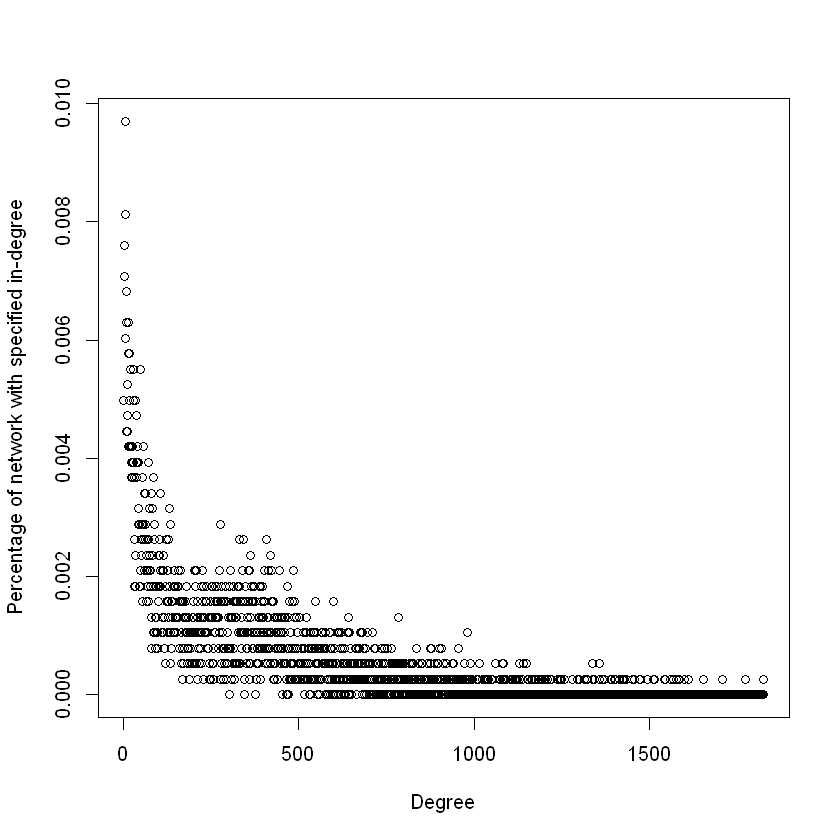

In [51]:
dist = degree_distribution(g3, mode = "in")
plot(dist, xlab="Degree", ylab="Percentage of network with specified in-degree")

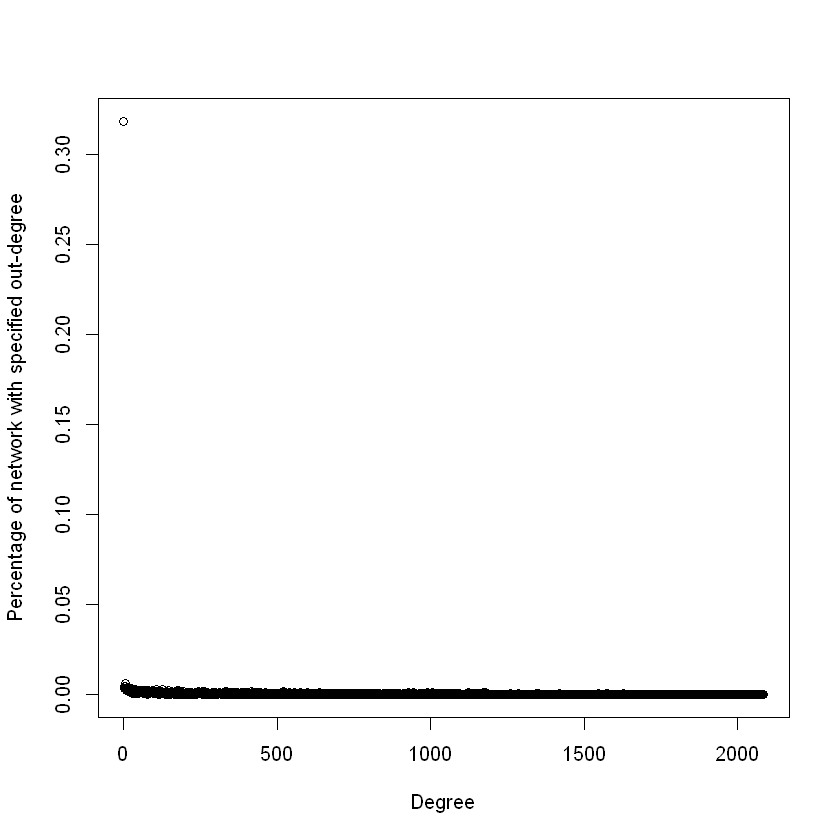

In [49]:
dist = degree_distribution(g3, mode = "out")
plot(dist, xlab="Degree", ylab="Percentage of network with specified out-degree")

#### Q20

In [22]:
cluster1 = cluster_walktrap(g1)
cluster2 = cluster_walktrap(g2)
cluster3 = cluster_walktrap(g3)

modularity(cluster1)
modularity(cluster2)
modularity(cluster3)

[1] 0.2798194

[1] 0.3230868

[1] 0.1950912

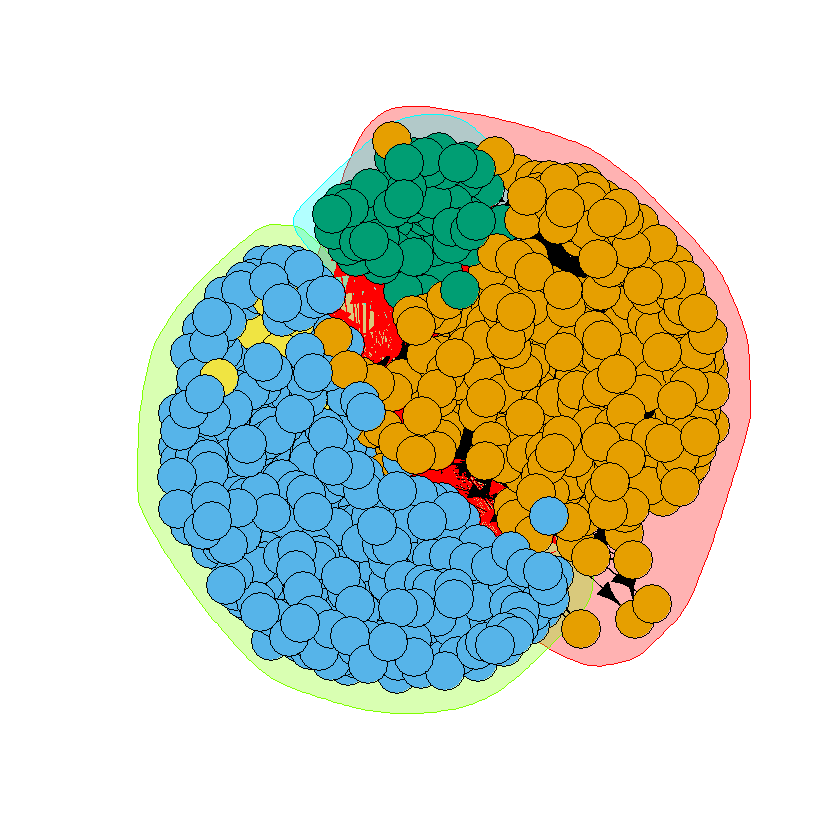

In [57]:
plot(cluster1,g1,vertex.label=NA)

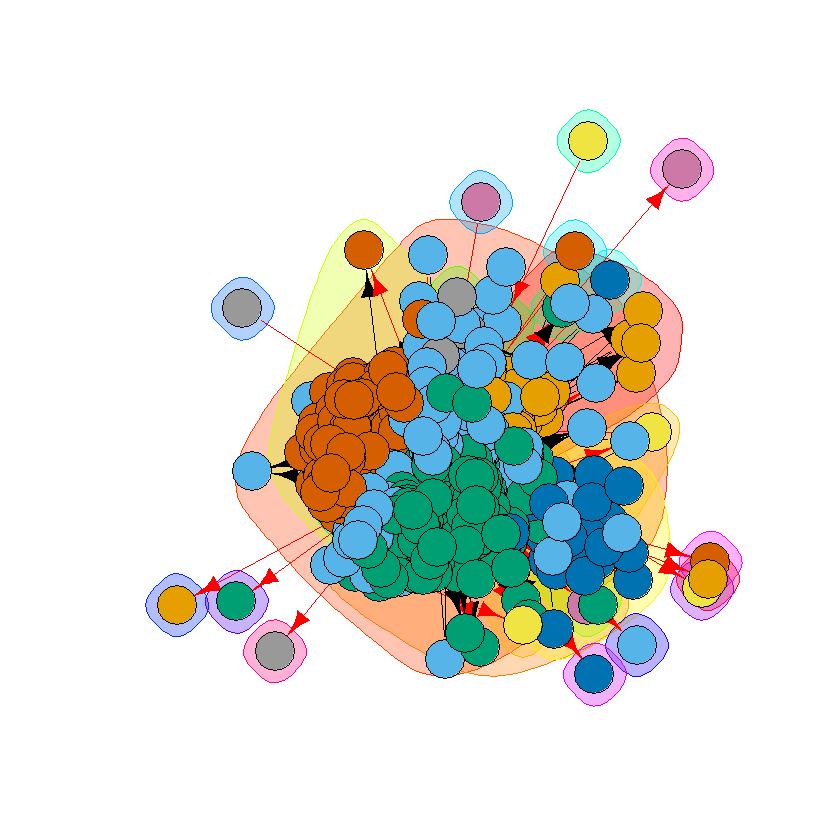

In [58]:
plot(cluster2,g2,vertex.label=NA)

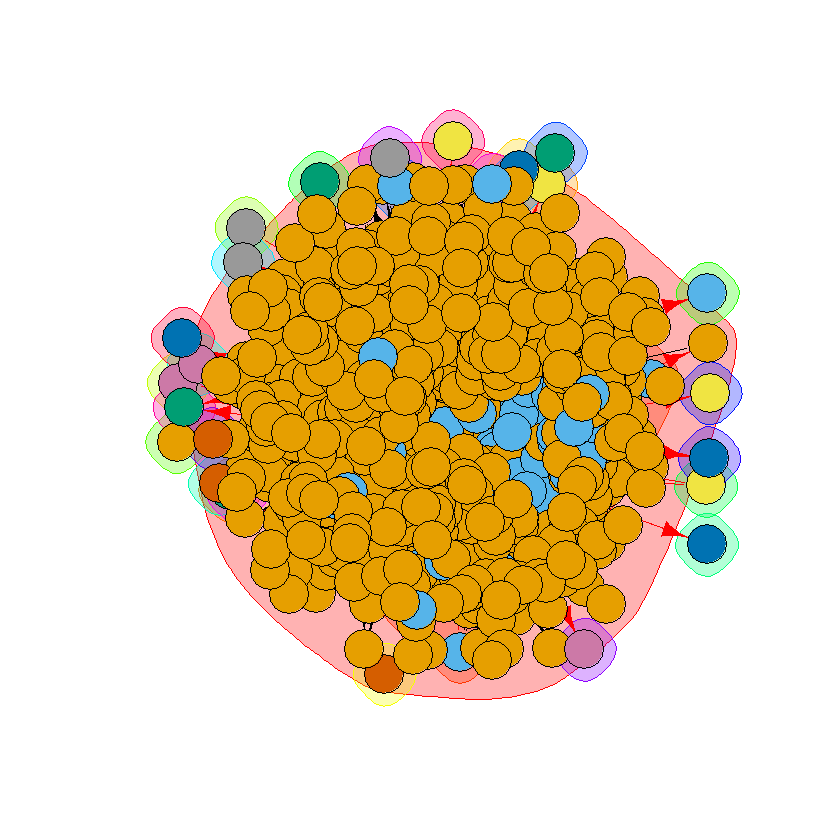

In [59]:
plot(cluster3,g3,vertex.label=NA)

#### Q21

Homogeneity: Measures how much each cluster contains only members of a single circle

Completeness: Measures how many people in a circle are assigned to the same cluster

#### Q22

In [51]:
# load data
n=countLines("gplus/101373961279443806744.circles") #find number of rows

file<-file("gplus/101373961279443806744.circles",open="rt") #reopen connection, the pointer now is at first row again
circle_data<-list() #init list data structure
# scan(file,what=1,nlines=1,sep="\t") #skip first blank row

for(i in 1:(n) ){
    tmp_list = scan(file,what="string",nlines=1,sep="\t")
    circle_data[[i]]= tmp_list[- 1]# remove name of circle
}
close(file)

In [72]:
# H(C|K)
H_ck = 0

# calculate N
flat_list = unlist(circle_data, recursive=FALSE)
no_duplicates_list = unique(flat_list)
N = length(no_duplicates_list)
# print(N)

for(j in 1:length(circle_data)){
    
    for(i in 1:length(cluster1)){
        print(circle_data[j])
        print(cluster1[i])
        A_ji = intersect(circle_data[j],cluster1[i])
#         print(A_ji)
        
        print(length(circle_data[j]))
        
        H_ck = H_ck + 1
        
    }
}

# # loop version 1
# for (p in primes_list) {
#   print(p)
# }

# # loop version 2
# for (i in 1:length(primes_list)) {
#   print(primes_list[[i]])
# }

[[1]]
  [1] "103115473754659376168" "114801877818306839095" "114127684466692817416"
  [4] "106896834505928192955" "104547122294871942949" "117865945859719231324"
  [7] "103888069615589058326" "108633099657919433565" "105621403584928506108"
 [10] "117000139571713536948" "100473244509062237147" "111749793836380057642"
 [13] "113722211762693166526" "117951052831974893962" "105575110775527575127"
 [16] "106078817258497259289" "115655205216183932495" "115289524882519831247"
 [19] "106658849511427440492" "104639356062913210803" "101153468639331529713"
 [22] "113962866520226485377" "104833564316573420990" "114699780864258329431"
 [25] "101348397943983026449" "115080215652229659698" "105318217552727882571"
 [28] "111789849226621844437" "107382971911415711178" "115329901579467138335"
 [31] "112957065719498086306" "106758488395906535821" "100774699436094132400"
 [34] "104378154756194093727" "108483700324316970657" "101163341054929669293"
 [37] "114835618008913240560" "112617127041903537004" "116

In [63]:
list_a = list("what","test")
list_b = list("why","test")
print(intersect(list_a,list_b))

[[1]]
[1] "test"

